Epoch 1/250, A: [1.637714], B: [1.1519516], C: [-0.7998918], Cost: 4.425641059875488
Epoch 1/250, A: [1.6343315], B: [1.1471425], C: [-0.79296625], Cost: 3.5611355304718018
Epoch 1/250, A: [1.631807], B: [1.1435459], C: [-0.7877632], Cost: 3.382420063018799
Epoch 1/250, A: [1.6294694], B: [1.1402103], C: [-0.78292114], Cost: 2.823493003845215
Epoch 1/250, A: [1.6262853], B: [1.1356599], C: [-0.77629423], Cost: 3.133195161819458
Epoch 1/250, A: [1.6234125], B: [1.131546], C: [-0.77027595], Cost: 3.5362725257873535
Epoch 1/250, A: [1.6208985], B: [1.1279391], C: [-0.7649774], Cost: 3.841259241104126
Epoch 1/250, A: [1.6194875], B: [1.1259115], C: [-0.7619876], Cost: 2.007108688354492
Epoch 1/250, A: [1.6171776], B: [1.1225889], C: [-0.75707823], Cost: 2.9688713550567627
Epoch 1/250, A: [1.6148177], B: [1.1191894], C: [-0.75203747], Cost: 2.7855658531188965
Epoch 2/250, A: [1.612607], B: [1.1159997], C: [-0.7472905], Cost: 2.604283332824707
Epoch 2/250, A: [1.6102711], B: [1.1126244], C: 

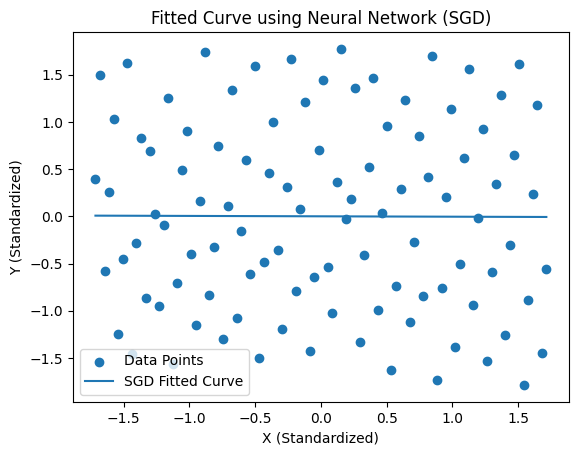

Epoch 1/250, A: [-0.8236081], B: [-0.83383787], C: [-0.6073305], Cost: 1.3731094598770142
Epoch 1/250, A: [-0.82287425], B: [-0.833113], C: [-0.6063353], Cost: 1.1062438488006592
Epoch 1/250, A: [-0.8225277], B: [-0.83277076], C: [-0.605865], Cost: 0.9930731058120728
Epoch 1/250, A: [-0.82247216], B: [-0.8327159], C: [-0.6057896], Cost: 0.99163419008255
Epoch 1/250, A: [-0.82244825], B: [-0.8326923], C: [-0.6057572], Cost: 0.9592439532279968
Epoch 1/250, A: [-0.82239985], B: [-0.8326445], C: [-0.6056915], Cost: 1.0891122817993164
Epoch 1/250, A: [-0.82227886], B: [-0.832525], C: [-0.6055272], Cost: 1.0877090692520142
Epoch 1/250, A: [-0.8220183], B: [-0.83226764], C: [-0.6051734], Cost: 1.2257872819900513
Epoch 1/250, A: [-0.8212587], B: [-0.8315174], C: [-0.6041416], Cost: 1.2975119352340698
Epoch 1/250, A: [-0.8206468], B: [-0.830913], C: [-0.60330975], Cost: 1.3379037380218506
Epoch 2/250, A: [-0.81976575], B: [-0.8300428], C: [-0.6021113], Cost: 1.3598761558532715
Epoch 2/250, A: [

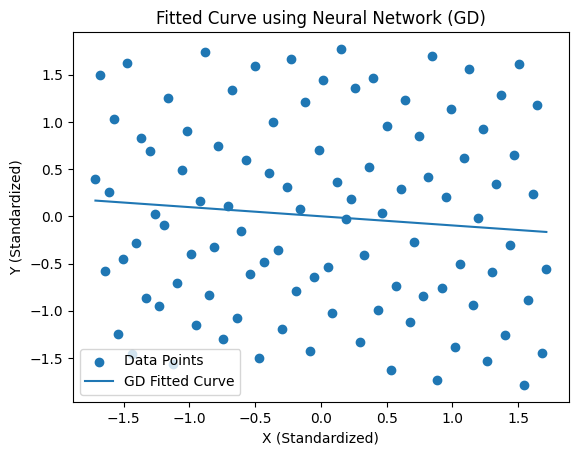

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data from file
x = []
y = []

with open('Part1_x_y_Values.txt', 'r') as file:
    data = file.readlines()[1:]

for point in data:
    xVal, yVal = point.strip()[1:-1].split(',')
    x.append(float(xVal))
    y.append(float(yVal))

x = np.array(x)
y = np.array(y)

# Standardize X and Y using StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_standardized = scaler_x.fit_transform(x.reshape(-1, 1))
y_standardized = scaler_y.fit_transform(y.reshape(-1, 1))

# Data
points_standardized = np.hstack((x_standardized, y_standardized))

# Keras model for SGD
model_sgd = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1], use_bias=False),
    tf.keras.layers.Dense(units=1, activation='linear', use_bias=False),
    tf.keras.layers.Dense(units=1, activation='linear')
])

# Implement true SGD using tf.data.Dataset
learning_rate_sgd = 0.001
num_epochs_sgd = 250
batch_size = 10

for epoch in range(num_epochs_sgd):
    dataset = tf.data.Dataset.from_tensor_slices((points_standardized[:, 0], points_standardized[:, 1]))
    dataset = dataset.shuffle(buffer_size=len(points_standardized)).batch(batch_size)

    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            y_pred = model_sgd(x_batch, training=True)
            y_batch = tf.cast(y_batch, dtype=tf.float32)
            loss = tf.reduce_mean(tf.square(y_pred - y_batch))
        gradients = tape.gradient(loss, model_sgd.trainable_variables)
        for i in range(len(model_sgd.trainable_variables)):
            if gradients[i] is not None:
                model_sgd.trainable_variables[i].assign_sub(learning_rate_sgd * gradients[i])
        weights = [w[0] for w in model_sgd.get_weights()]
   
        # Report weights for each epoch
        print(f"Epoch {epoch+1}/{num_epochs_sgd}, A: {weights[0]}, B: {weights[1]}, C: {weights[2]}, Cost: {loss.numpy()}")

# Plot the standardized data and fitted curve for SGD
plt.scatter(points_standardized[:, 0], points_standardized[:, 1], label='Data Points')
x_range_sgd = np.linspace(min(points_standardized[:, 0]), max(points_standardized[:, 0]), 100)
y_pred_standardized_sgd = model_sgd.predict(x_range_sgd.reshape(-1, 1))
plt.plot(x_range_sgd, y_pred_standardized_sgd, label='SGD Fitted Curve')
plt.xlabel('X (Standardized)')
plt.ylabel('Y (Standardized)')
plt.title('Fitted Curve using Neural Network (SGD)')
plt.legend()
plt.show()

# Keras model for GD
model_gd = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1], use_bias=False),
    tf.keras.layers.Dense(units=1, activation='linear', use_bias=False),
    tf.keras.layers.Dense(units=1, activation='linear')
])

# Implement GD using tf.data.Dataset (without shuffling)
learning_rate_gd = 0.001
num_epochs_gd = 250


for epoch in range(num_epochs_gd):
    dataset = tf.data.Dataset.from_tensor_slices((points_standardized[:, 0], points_standardized[:, 1]))
    dataset = dataset.batch(batch_size)

    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            y_pred = model_gd(x_batch, training=True)
            y_batch = tf.cast(y_batch, dtype=tf.float32)
            loss = tf.reduce_mean(tf.square(y_pred - y_batch))
        gradients = tape.gradient(loss, model_gd.trainable_variables)
        for i in range(len(model_gd.trainable_variables)):
            if gradients[i] is not None:
                model_gd.trainable_variables[i].assign_sub(learning_rate_gd * gradients[i])
        weights = [w[0] for w in model_gd.get_weights()]
   
        # Report weights for each epoch
        print(f"Epoch {epoch+1}/{num_epochs_gd}, A: {weights[0]}, B: {weights[1]}, C: {weights[2]}, Cost: {loss.numpy()}")

# Plot the standardized data and fitted curve for GD
plt.scatter(points_standardized[:, 0], points_standardized[:, 1], label='Data Points')
x_range_gd = np.linspace(min(points_standardized[:, 0]), max(points_standardized[:, 0]), 100)
y_pred_standardized_gd = model_gd.predict(x_range_gd.reshape(-1, 1))
plt.plot(x_range_gd, y_pred_standardized_gd, label='GD Fitted Curve')
plt.xlabel('X (Standardized)')
plt.ylabel('Y (Standardized)')
plt.title('Fitted Curve using Neural Network (GD)')
plt.legend()
plt.show()